# Assignment-1

<div align="center">
<img src="img/asgn.jpg" alt="asgn.jpg" width="1000px">
</div>

In [ ]:
"""
cd .\04assignment\
jupyter nbconvert --to markdown asng.ipynb --output README.md
"""

## Load Data

### Processing file - test codes

In [27]:
with open('38943-0.txt', 'r') as target_file:
	for num, line in enumerate(target_file.readlines()):
		if "Title" in line:
			title = line.split(":")[1].strip()
			print(title)
		if "Author" in line:
			author_name = line.split(":")[1].strip()
			print(author_name)
author_list = [author_name]*5
author_list

Science and Medieval Thought
Sir Thomas Clifford Allbutt


['Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt']

In [3]:
out = open("64171-0_chapter.txt", "w")
with open('64171-0.txt', 'r') as f:
	data = f.read()
	if "CHAPTER I." in data:
		data = data.replace("CHAPTER I.", "CHAPTERI.")
		print(data, file=out)
out.close()


In [4]:
list_of_blocks = []
with open('64171-0_chapter.txt', 'r') as f:
	data = f.read()
	# print(len(data.split()))
	total_word = len(data.split())
	data = data.split()
	# indices = []
	# for i, w in enumerate(data):
	# 	# start reading from CHAPTER I.
	# 	if "CHAPTERI" in w:
	# 		indices.append(i)
	# last = indices[-1]
	# # print(last)
	# data = data[last+1:]

	n = 200
	for i in range(n):
		s = round(total_word*i/n)
		e = round(total_word*(1+i)/n)
		# print(s,e)
		chunks = data[s:e]
		chunks = " ".join(chunks)
		# print(chunks)
		# print(100*"=")
		list_of_blocks.append(chunks)

# print(list_of_blocks)


### Processing file - Final

In [73]:
import os
def getTextFileList():
	all_files = os.listdir()
	txt_files = []
	for file in all_files:
		if file.endswith(".txt"):
			txt_files.append(file)
	return txt_files

In [74]:
from termcolor import cprint
def processFiles(text_files,document_no=200):
	df_obj_of_documents = {
		"documents":[],
		"author":[]
	}
	list_of_documents = []
	list_of_authors = []
	for file in text_files:
		cprint(f"Extracting from: {file}", 'green')
		# get Title and Author name
		author_name=""
		with open(file, 'r') as target_file:
			for num, line in enumerate(target_file.readlines()):
				pass
				if "Title:" in line:
					title = line.split(":")[1].strip()
				if "Author:" in line:
					print(line)
					author_name = line.split(":")[1].strip()

		# get documents from each file
		with open(file, 'r') as f:
			data = f.read()
			total_word = len(data.split())
			data = data.split()
			# indices = []
			# for i, w in enumerate(data):
			# 	# start reading from CHAPTER I.
			# 	if "CHAPTERI" in w:
			# 		indices.append(i)
			# last = indices[-1]
			# # print(last)
			# data = data[last+1:]

			# n = 200
			for i in range(document_no):
				start_from = round(total_word*i/document_no)
				end_at = round(total_word*(1+i)/document_no)
				document = data[start_from:end_at]
				document = " ".join(document)
				# print(chunks)
				# print(100*"=")
				list_of_documents.append(document)
				
		print("Book Title: ",end="")
		cprint(title, 'yellow')		
		print("Author: ",end="")
		cprint(author_name, 'yellow')
		# generated_doc_size = len(list_of_documents)
		print("Documents generated: ",end="")
		cprint(document_no, 'yellow')
		repeating_author = [author_name]*document_no
		# print(repeating_author)
		list_of_authors = list_of_authors + repeating_author
		# save to dataframe
	df_obj_of_documents["author"] = list_of_authors
	df_obj_of_documents["documents"] = list_of_documents
	# print(df_obj_of_documents)
	print(len(list_of_authors))
	print(len(list_of_documents))
	return df_obj_of_documents


```pseudocode
fil1 
	doc 1 - a
	doc 2 - a
	doc 3 - a
fil2 
	doc 1 - b
	doc 2 - b
	doc 3 - b
	
doc 	= [doc 1, doc 2, doc 3,doc 1 ,doc 2,doc 3]
author 	= [a,a,a,b ,b,b]
```

In [75]:
df_obj_of_documents = processFiles(getTextFileList(),document_no=200)

Extracting from: 38943-0.txt
Author: Sir Thomas Clifford Allbutt

Book Title: Science and Medieval Thought
Author: Sir Thomas Clifford Allbutt
Documents generated: 200
Extracting from: 64171-0.txt
Author: Robert C. (Chamblet) Adams

Book Title: On Board the "Rocket"
Author: Robert C. (Chamblet) Adams
Documents generated: 200
Extracting from: 65708-0.txt
Author: Averroes

Book Title: The Philosophy and Theology of Averroes
Author: Averroes
Documents generated: 200
Extracting from: pg24055.txt
Author: Confucius

Book Title: The Sayings Of Confucius
Author: Confucius
Documents generated: 200
Extracting from: pg2412.txt
Author: Aristotle

Book Title: The Categories
Author: Aristotle
Documents generated: 200
Extracting from: pg34283.txt
Author: Alfred William Benn

Book Title: History of Modern Philosophy
Author: Alfred William Benn
Documents generated: 200
Extracting from: pg66566.txt
Author: T.J. de Boer

Book Title: The History of Philosophy in Islam
Author: T.J. de Boer
Documents genera

In [76]:
import pandas as pd
# df = pd.DataFrame({
# 	'data': list_of_blocks,
# 	"author": author_list
# })
df = pd.DataFrame(df_obj_of_documents)
df.head()
# df.to_csv("data.csv", index=False)

,documents,author
0,"﻿The Project Gutenberg eBook, Science and Medi...",Sir Thomas Clifford Allbutt
1,SCIENCE AND MEDIEVAL THOUGHT. * * * * * London...,Sir Thomas Clifford Allbutt
2,"et facit nos concludere quæstionem, sed non ce...",Sir Thomas Clifford Allbutt
3,"a phantom, and again the spirit of a new world...",Sir Thomas Clifford Allbutt
4,first applied to the art and romance of the Mi...,Sir Thomas Clifford Allbutt


In [77]:
df['words_count'] = df['documents'].apply(lambda x: len(x.split()))
df.head()

,documents,author,words_count
0,"﻿The Project Gutenberg eBook, Science and Medi...",Sir Thomas Clifford Allbutt,142
1,SCIENCE AND MEDIEVAL THOUGHT. * * * * * London...,Sir Thomas Clifford Allbutt,143
2,"et facit nos concludere quæstionem, sed non ce...",Sir Thomas Clifford Allbutt,142
3,"a phantom, and again the spirit of a new world...",Sir Thomas Clifford Allbutt,142
4,first applied to the art and romance of the Mi...,Sir Thomas Clifford Allbutt,143


In [78]:
df['words_count'].min()

87

In [79]:
# df[df["author"]=="Aristotle"]

In [80]:
df = df.drop(df[df['words_count'] < 100].index)
# drop documents with less than 100 words

In [81]:
df['words_count'].min()

142

### Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [83]:
df['label'] = labelencoder.fit_transform( df['author'])
df.head()

,documents,author,words_count,label
0,"﻿The Project Gutenberg eBook, Science and Medi...",Sir Thomas Clifford Allbutt,142,4
1,SCIENCE AND MEDIEVAL THOUGHT. * * * * * London...,Sir Thomas Clifford Allbutt,143,4
2,"et facit nos concludere quæstionem, sed non ce...",Sir Thomas Clifford Allbutt,142,4
3,"a phantom, and again the spirit of a new world...",Sir Thomas Clifford Allbutt,142,4
4,first applied to the art and romance of the Mi...,Sir Thomas Clifford Allbutt,143,4


In [84]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,documents,author,words_count,label
0,people tremble.[32] [Footnote 32: _Tremble_ an...,Confucius,173,2
1,pushed back into efficient reason or divine wi...,Sir Thomas Clifford Allbutt,142,4
2,in the interpretation itself. Amongst these ma...,Averroes,278,1
3,highest degree of perfection and an eternal pl...,T.J. de Boer,320,5
4,"also the masts and yards, and wearing away the...",Robert C. (Chamblet) Adams,395,3


## Data Pre-Process

In [85]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import re
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()


In [86]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
EMAIL_RE = re.compile('\b[\w\-.]+?@\w+?\.\w{2,4}\b')
PHONE_RE=re.compile('\b(\+\d{1,2}\s?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})\b')
NUMBER_RE=re.compile('\d+(\.\d+)?')
URLS_RE = re.compile('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)')
PUNCTUATION_RE = re.compile('[^\w\s]')
EXTRA_SPACE_RE = re.compile('\s+')
STOPWORDS = set(stopwords.words('english'))

def get_simple_pos(tag):

	if tag.startswith("J"):
		return wordnet.ADJ
	elif tag.startswith("V"):
		return wordnet.VERB
	elif tag.startswith("N"):
		return wordnet.NOUN
	elif tag.startswith("R"):
		return wordnet.ADV
	else:
		return wordnet.NOUN

def cleanText(msg):
	msg = REPLACE_BY_SPACE_RE.sub(' ',msg)
	msg = BAD_SYMBOLS_RE.sub('',msg)
	msg = EMAIL_RE.sub('',msg)
	msg = URLS_RE.sub('',msg)
	msg = PHONE_RE.sub('',msg)
	msg = NUMBER_RE.sub('',msg)
	msg = PUNCTUATION_RE.sub('',msg)
	msg = EXTRA_SPACE_RE.sub(' ',msg)

	# Lower case
	msg = msg.lower()

	# Tokenize
	words = word_tokenize(msg)

	# Remove Stop Words
	words = [w for w in words if not w in STOPWORDS]

	# Stemming
	stemmed_words = [ps.stem(w) for w in words]
	
	# Lemmatization
	# lemmatized_words = [lemmatizer.lemmatize(w, get_simple_pos(pos_tag([w])[0][1])) for w in words]
	# for w in words:
	# 	postag = pos_tag([w])
	# 	pos = get_simple_pos(postag[0][1])
	# 	clean_word = lemmatizer.lemmatize(w, pos=pos)
	# 	lemmatized_words.append(clean_word)

	# Join the words back into one string separated by space,
	stemmed_sen = ' '.join(stemmed_words)

	return stemmed_sen


In [87]:
df['clean_msg'] = df.documents.apply(cleanText)
df.head()

,documents,author,words_count,label,clean_msg
0,people tremble.[32] [Footnote 32: _Tremble_ an...,Confucius,173,2,peopl trembl ootnot _remble_ _chestnut_ sound ...
1,pushed back into efficient reason or divine wi...,Sir Thomas Clifford Allbutt,142,4,push back effici reason divin almost vanish la...
2,in the interpretation itself. Amongst these ma...,Averroes,278,1,interpret mongst may mention bu amid l hazzali...
3,highest degree of perfection and an eternal pl...,T.J. de Boer,320,5,highest degre perfect etern plenitud realiti s...
4,"also the masts and yards, and wearing away the...",Robert C. (Chamblet) Adams,395,3,also mast yard wear away deck holyston well le...


In [88]:
df['documents'].iloc[0]


"people tremble.[32] [Footnote 32: _Tremble_ and _chestnut_ have the same sound in Chinese.] On hearing this, the Master said, I do not speak of what is ended, chide what is settled, or find fault with what is past.[33] [Footnote 33: In old times men had been sacrificed at the earth-altars, and Tsai Wo's answer might seem to approve the practice.] 22. The Master said, How shallow was Kuan Chung! But, said one, was not Kuan Chung thrifty? The Kuan, said the Master, owned San Kuei, and no one of his household held two posts: was that thrift? At least Kuan Chung knew good form. The Master said, Kings screen their gates with trees; the Kuan, too, had trees to screen his gate. When two kings are carousing, they have a stand for the turned-down cups; the Kuan had a turned-down cup-stand, too! If the Kuan knew good form, who does not know good form?[34] [Footnote 34: Kuan Chung (+ 645 B.C.), a famous man in his day, was chief minister to the Duke"

In [89]:
df['clean_msg'].iloc[0]


'peopl trembl ootnot _remble_ _chestnut_ sound hines n hear aster said speak end chide settl find fault past ootnot n old time men sacrif earthaltar sai os answer might seem approv practic aster said ow shallow uan hung ut said one uan hung thrifti uan said aster own uei one household held two post thrift least uan hung knew good form aster said ing screen gate tree uan tree screen gate hen two king carous stand turneddown cup uan turneddown cupstand f uan knew good form know good form ootnot uan hung famou man day chief minist uke'

## Split the data into training and test sets


In [90]:
# Split into X/y
from sklearn.model_selection import train_test_split, cross_val_score

x = df["documents"]
y = df["label"]
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200,)
(1200,)
(960,)
(240,)
(960,)
(240,)


## Vectorization: Convert text features to numeric


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
# sublinear_df=True, use a logarithmic form for frequency

# cv2 = TfidfVectorizer(ngram_range=(1, 2)) 

cv2 = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2',
                      ngram_range=(1, 2), stop_words='english')

# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1

X_traincv = cv2.fit_transform(x_train)
x_testcv = cv2.transform(x_test)
print(X_traincv.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Train the model

In [92]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()

In [93]:
mnb.fit(X_traincv, y_train)

MultinomialNB()

In [94]:
mnb.score(x_testcv, y_test)*100

89.58333333333334

In [95]:
print(f"Test Text:")
print(x_test.iloc[1])

Test Text:
said, that music could reach such heights. 14. Jan Yu said, Is the Master for the lord of Wei?[66] [Footnote 66: The grandson of Duke Ling, the husband of Nan-tzu. His father had been driven from the country for plotting to kill Nan-tzu. When Duke Ling died, he was succeeded by his grandson, who opposed by force his father's attempts to seize the throne.] I shall ask him, said Tzu-kung. He went in, and said, What kind of men were Po-yi[67] and Shu-ch'i? Worthy men of yore, said the Master. Did they rue the past? They sought love and found it; what had they to rue? Tzu-kung went out, and said, The Master is not for him. 15. The Master said, Eating coarse rice and drinking water, with bent arm for pillow, we may be merry; but ill-gotten wealth and honours are to me a wandering cloud. 16. The Master said, Given a few more years, making fifty for learning the Yi,[68] I might be freed from gross faults. [Footnote 67: See Book


In [96]:
actual_label = y_test.iloc[1]
actual_label

2

In [97]:
labelencoder.inverse_transform([actual_label])

array(['Confucius'], dtype=object)

In [98]:
y_pred = mnb.predict(cv2.transform([x_test.iloc[1]]))
print(f"Predicted Y : {y_pred[0]}, author: {labelencoder.inverse_transform([y_pred[0]])}")

Predicted Y : 2, author: ['Confucius']


In [99]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=50)
# knn.fit(X_traincv, y_train)
# knn.score(x_testcv, y_test)*100

## Hyperparameter tuning: Searching for the ideal model

In [100]:
from termcolor import cprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# ignore ConvergenceWarnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = [
    { "model_instance": KNeighborsClassifier(),
      "model_name": "KNeighbors",
      "params": {
          "n_neighbors": [25,30,35,45],
          "weights": ['uniform','distance'],
          "leaf_size": [25,30,35]
        }
    },
    { "model_instance": DecisionTreeClassifier(),
      "model_name": "DecisionTree",
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None,90,95,100],
          "max_features": [None, "auto","sqrt","log2"],
          "random_state": [42]
      }
    },
    { "model_instance": MultinomialNB(),
      "model_name":"MultinomialNB",
      "params": {
          "fit_prior": [True, False]
      }
    },
    { "model_instance": LinearSVC(),
      "model_name": "SVC",
      "params": {
          "loss": ['hinge','squared_hinge'],
          "multi_class": ['ovr', 'crammer_singer'],
          "fit_intercept": [True, False],
          "random_state": [42],
          "max_iter": [900, 1000, 1100]
      }
    },
    { "model_instance": svm.SVC(),
      "model_name": "SVM",
      "params": {
          'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
      }
    },
    { "model_instance": RandomForestClassifier(),
      "model_name": "RandomForest",
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [85,90,95,100],
      "max_features": ['sqrt','log2'],
      "n_estimators": [60, 80, 90],
      "random_state": [42]
      }
    },
    { "model_instance": SGDClassifier(),
      "model_name": "SGDClassifier",
      "params": {
          "loss": ['hinge','log','perceptron'],
          "penalty": ['l2', 'l1'],
          "alpha": [0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [1000, 1500],
          "random_state": [42]
      }
    }
]

scores = []
highest_acc = 0
best_model = None

for model in models:

  # Create a based model
  model_instance = model["model_instance"]
  model_name = model["model_name"]
  print("Running Model:",end="")
  cprint(model_name, "green")
  # Instantiate the grid search model
  classifier = GridSearchCV(estimator=model_instance, param_grid=model["params"],
                            cv = 10, n_jobs = 1)

  # Fit the model
  classifier.fit(X_traincv, y_train);

  # Make a prediction on the test split to find model accuracy
  predicted = classifier.predict(x_testcv)
  acc = accuracy_score(predicted, y_test)
  # If model have the highest accuracy, it's out best model
  if acc > highest_acc:
    highest_acc = acc
    best_model = classifier

  scores.append({
    "model":model_name,
    "training_best_score": classifier.best_score_,
    "test_best_score": acc,
    "best_params": classifier.best_params_
  })

  print("Best Training Score:",end="")
  cprint(f"{round(classifier.best_score_*100,2)}%  ", "cyan", end="")
  print("Best Test Score:",end="")
  cprint(f"{round(acc*100,2)}%  ", "cyan")

  print("Best Params:",end="")
  cprint(classifier.best_params_,"yellow")

print("\nBest Model:",end="")
cprint(best_model.best_estimator_,"red")


Running Model:KNeighbors
Best Training Score:88.85%  Best Test Score:88.75%  
Best Params:{'leaf_size': 25, 'n_neighbors': 25, 'weights': 'uniform'}
Running Model:DecisionTree
Best Training Score:75.62%  Best Test Score:75.83%  
Best Params:{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 42, 'splitter': 'best'}
Running Model:MultinomialNB
Best Training Score:90.21%  Best Test Score:90.42%  
Best Params:{'fit_prior': False}
Running Model:SVC
Best Training Score:92.08%  Best Test Score:92.08%  
Best Params:{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 900, 'multi_class': 'crammer_singer', 'random_state': 42}
Running Model:SVM
Best Training Score:92.71%  Best Test Score:91.67%  
Best Params:{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Running Model:RandomForest
Best Training Score:91.25%  Best Test Score:90.0%  
Best Params:{'bootstrap': False, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 80, 'random_state': 42}
Runnin

In [101]:
d = pd.DataFrame(scores)
d


,model,training_best_score,test_best_score,best_params
0,KNeighbors,0.888542,0.887500,"{'leaf_size': 25, 'n_neighbors': 25, 'weights'..."
1,DecisionTree,0.756250,0.758333,"{'criterion': 'gini', 'max_depth': None, 'max_..."
2,MultinomialNB,0.902083,0.904167,{'fit_prior': False}
3,SVC,0.920833,0.920833,"{'fit_intercept': True, 'loss': 'hinge', 'max_..."
4,SVM,0.927083,0.916667,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"
5,RandomForest,0.912500,0.900000,"{'bootstrap': False, 'criterion': 'gini', 'max..."
6,SGDClassifier,0.917708,0.912500,"{'alpha': 0.001, 'early_stopping': True, 'loss..."


### Plotting each models performance

<AxesSubplot:xlabel='model', ylabel='test_best_score'>

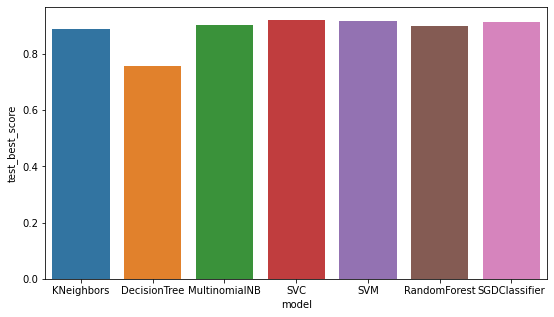

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
sns.barplot(x='model', y='test_best_score', data=d, errwidth=0)


## Evaluating the model and make predictions using the Best Model

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict


Now we make predictions using the test data to see how the model performs

In [104]:
predicted = best_model.predict(x_testcv)
evaluate_preds(y_test, predicted)


Acc: 92.08%
Precision: 0.92
Recall: 0.92
F1 score: 0.92


{'accuracy': 0.92, 'precision': 0.92, 'recall': 0.92, 'f1': 0.92}

Classification report

In [105]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
                                    target_names=df['author'].unique()))

                             precision    recall  f1-score   support

                  Confucius       1.00      0.82      0.90        49
Sir Thomas Clifford Allbutt       0.95      0.97      0.96        40
                   Averroes       0.91      0.93      0.92        42
               T.J. de Boer       1.00      0.98      0.99        43
 Robert C. (Chamblet) Adams       0.76      0.89      0.82        36
        Alfred William Benn       0.91      0.97      0.94        30

                   accuracy                           0.92       240
                  macro avg       0.92      0.93      0.92       240
               weighted avg       0.93      0.92      0.92       240



Confusion Matrix

In [106]:
df["author"].unique()


array(['Confucius', 'Sir Thomas Clifford Allbutt', 'Averroes',
       'T.J. de Boer', 'Robert C. (Chamblet) Adams',
       'Alfred William Benn'], dtype=object)

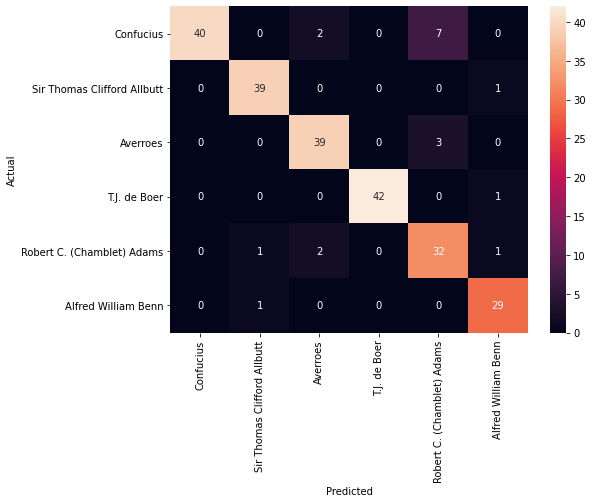

In [107]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df["author"].unique(), yticklabels=df["author"].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Results

- `n-fold = 3`

<div align="center">
<img src="img/cv_3.jpg" alt="cv_3.jpg" width="900px">
</div>

- default `n-fold = 5`

<div align="center">
<img src="img/cv_5.jpg" alt="cv_5.jpg" width="900px">
</div>

- default `n-fold = 5`, without dropping words len < 100

<div align="center">
<img src="img/cv_5_no_w_drop.jpg" alt="cv_5_no_w_drop.jpg" width="900px">
</div>

- `n-fold = 10`

<div align="center">
<img src="img/cv_10.jpg" alt="cv_10.jpg" width="900px">
</div>

<div align="center">
<img src="img/cv_10_1.jpg" alt="cv_10_1.jpg" width="900px">
</div>

<div align="center">
<img src="img/cv_10_2.jpg" alt="cv_10_2.jpg" width="900px">
</div>